In [80]:
%matplotlib inline
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageDraw


In [52]:
# Randomly draw the Euler angles alpha, beta, and gamma from uniform distributions within reasonable bounds
# at a distance of 10 meters, rotation about x should change pointing by no more than 1 meter
# max rotaion angle is ~ 0.1 rad = 180/pi/10 ~ 6 deg
max_rot = 0.2
alpha = max_rot*np.rnd.normal(0, 1)
beta = max_rot*np.rnd.normal(0, 1)
gamma = max_rot*np.rnd.normal(0, 1)
print(alpha, beta, gamma)

-0.30680745413663174 0.0822688426453212 0.06450587219037339


In [53]:
# introduce shorthand notation 
cb = np.cos(beta)
sb = np.sin(beta)
ca = np.cos(alpha)
sa = np.sin(alpha)
cg = np.cos(gamma)
sg = np.sin(gamma)

In [54]:
# Rotation matrices for the z-x-z Euler transformation
Rza = np.array([[ca, sa, 0.],[-sa, ca, 0.],[0., 0., 1.]])
Rxb = np.array([[1., 0., 0.],[0., cb, sb],[0., -sb, cb]])
Rzg = np.array([[cg, sg, 0.],[-sg, cg, 0.],[0., 0., 1.]])

# compose the rotations to form the Euler transformation
R = Rzg@Rxb@Rza


In [107]:
# column vectors for points at corners of a square in the original coordinate system 
x1 = np.array([0,0,128])[:,None]
x2 = np.array([128,0,128])[:,None]
x3 = np.array([128,128,128])[:,None]
x4 = np.array([0,128,128])[:,None]

In [56]:
X1 = R@x1
X2 = R@x2
X3 = R@x3
X4 = R@x4

In [110]:
xs = np.array([x1[0],x2[0],x3[0],x4[0]])
ys = np.array([x1[1],x2[1],x3[1],x4[1]])
Xs = np.array([X1[0],X2[0],X3[0],X4[0]])
Ys = np.array([X1[1],X2[1],X3[1],X4[1]])

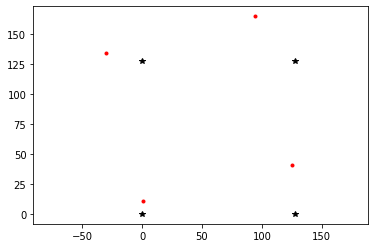

In [103]:
fig, ax = plt.subplots()
ax.plot(xs,ys,'k*')
ax.plot(Xs,Ys,'r.')
ax.axis('equal')
plt.show()

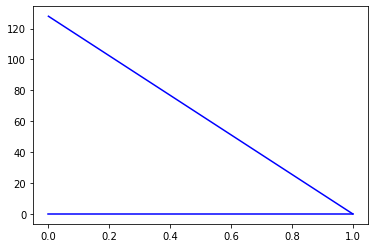

In [72]:
segments = {1: [(xs[0],ys[0]),
                (xs[1], ys[1])]}
#            2: [(0, 250),
#                (500, 1000)]}

colors = {1: 'b', 2: 'r'}

for y in segments:
    col = colors.get(y, 'k')
    for seg in segments[y]:
        plt.plot([seg[0],seg[1]], color=col)

In [71]:
segments[1][1]

(array([128]), array([0]))

In [70]:
segments[1][0]

(array([0]), array([0]))

In [73]:
seg

(array([128]), array([0]))

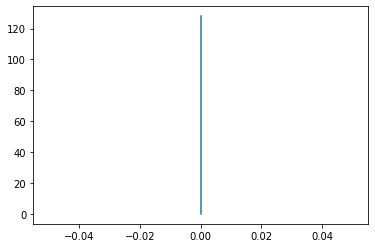

In [75]:
plt.plot(segments[1][0],segments[1][1])

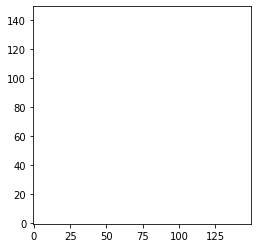

In [158]:
N = 60000
s = (150, 150)

im = Image.new('RGBA', s, (255,255,255,255))
draw = ImageDraw.Draw(im)

for i in range(len(xs)-1):
    #x1 = rnd.random() * s[0]
    #y1 = rnd.random() * s[1]
    #x2 = rnd.random() * s[0]
    #y2 = rnd.random() * s[1]
    alpha = rnd.random()
    # color  = (int(rnd.random() * 256), int(rnd.random() * 256), int(rnd.random() * 256), int(alpha * 256))
    # color = (255,255,255,255)
    #color = (0,0,0,0)

    # print(color)
    # print((xs.T[0][i],ys.T[0][i]),(xs.T[0][i+1],ys.T[0][i+1]))
    # draw.line(((xs.T[0][i],ys.T[0][i]),(xs.T[0][i+1],ys.T[0][i+1])), fill=color, width=10)
    draw.line(( (xs.T[0][i],ys.T[0][i]),(xs.T[0][i+1],ys.T[0][i+1]) ))

plt.imshow(np.asarray(im),
           origin='lower')
plt.show()

In [140]:
i

2

In [141]:
xs[i]

array([128])

In [142]:
xs

array([[  0],
       [128],
       [128],
       [  0]])

In [143]:
xs

array([[  0],
       [128],
       [128],
       [  0]])

In [116]:
xs.size

4

In [119]:
xs[0,:]

array([0])

In [120]:
xs.size()

TypeError: 'int' object is not callable

In [121]:
size(xs)

NameError: name 'size' is not defined

In [122]:
xs[1]

array([128])

In [124]:
xx=np.array([1,2,3,4])

In [125]:
xx

array([1, 2, 3, 4])

In [126]:
xx.size

4

In [127]:
xx[1]

2

In [129]:
x1.size

3

In [130]:
x1

array([[  0],
       [  0],
       [128]])

In [133]:
x1[None,:]

array([[[  0],
        [  0],
        [128]]])

In [134]:
x1.unsqueeze()

AttributeError: 'numpy.ndarray' object has no attribute 'unsqueeze'

In [135]:
x1[None]

array([[[  0],
        [  0],
        [128]]])

In [136]:
x1

array([[  0],
       [  0],
       [128]])

In [138]:
x1.T[0]

array([  0,   0, 128])

In [144]:
xs.T

array([[  0, 128, 128,   0]])

In [145]:
xs.T[0]

array([  0, 128, 128,   0])

In [147]:
xs.T[0][1]

128